### To predict the diabetes outcome of a patient based on various factors like Pregnancies, Glucose, BMI, Insulin, BP, Age

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('diabetes.csv')

In [10]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
lr = LogisticRegression(random_state=16, max_iter=500)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=500, random_state=16)

In [18]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [20]:
diff_df = pd.DataFrame({'Actual' : Y_test, 'Predicted': Y_pred})
diff_df

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [22]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
conf_matrix

array([[78, 21],
       [18, 37]], dtype=int64)

### Observations:
#### True Negatives (TN) = 78
The model correctly predicted 78 people as "No Diabetes."
#### False Positives (FP) = 21
The model incorrectly predicted 21 people as having diabetes when they actually didn't (Type I error).
#### False Negatives (FN) = 18
The model incorrectly predicted 18 people as "No Diabetes" when they actually had diabetes (Type II error).
#### True Positives (TP) = 37
The model correctly predicted 37 people as having diabetes.

In [24]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.79      0.80        99
   with diabetes       0.64      0.67      0.65        55

        accuracy                           0.75       154
       macro avg       0.73      0.73      0.73       154
    weighted avg       0.75      0.75      0.75       154



### Observations:
Accuracy = 75% → The model correctly classifies 75% of all instances in the dataset.
Precision (Positive Predictive Value):
Without diabetes: 0.81 → When the model predicts "without diabetes", it's correct 81% of the time.
With diabetes: 0.64 → When the model predicts "with diabetes", it's correct 64% of the time.

Recall (Sensitivity/True Positive Rate):
Without diabetes: 0.79 → The model correctly identifies 79% of all actual "without diabetes" cases.
With diabetes: 0.67 → The model correctly identifies 67% of all actual "with diabetes" cases.

F1-score (Balance between Precision & Recall):
Without diabetes: 0.80
With diabetes: 0.65
Since the F1-score for "with diabetes" is lower, the model struggles more with correctly predicting positive cases.

### Key Observations
The model performs better in predicting "without diabetes" than "with diabetes" (higher precision, recall, and F1-score).
The imbalance in class distribution (99 vs. 55) might be causing the lower performance for "with diabetes" cases.
The recall for "with diabetes" is 0.67, meaning 33% of actual diabetes cases are misclassified. This could be a problem in a medical setting where missing a diabetes diagnosis is critical.

### AUC-ROC curve:

In [27]:
Y_probs = lr.predict_proba(X_test)
Y_probs

array([[0.72413504, 0.27586496],
       [0.81155797, 0.18844203],
       [0.8855191 , 0.1144809 ],
       [0.83646638, 0.16353362],
       [0.52848031, 0.47151969],
       [0.55818951, 0.44181049],
       [0.98453985, 0.01546015],
       [0.3392191 , 0.6607809 ],
       [0.45852464, 0.54147536],
       [0.22266317, 0.77733683],
       [0.7440885 , 0.2559115 ],
       [0.10264846, 0.89735154],
       [0.66380426, 0.33619574],
       [0.69697148, 0.30302852],
       [0.91801716, 0.08198284],
       [0.61905833, 0.38094167],
       [0.86064899, 0.13935101],
       [0.92520786, 0.07479214],
       [0.13325806, 0.86674194],
       [0.43857517, 0.56142483],
       [0.79159095, 0.20840905],
       [0.9226025 , 0.0773975 ],
       [0.46039006, 0.53960994],
       [0.90541602, 0.09458398],
       [0.46052774, 0.53947226],
       [0.11444899, 0.88555101],
       [0.8756854 , 0.1243146 ],
       [0.96983451, 0.03016549],
       [0.74848518, 0.25151482],
       [0.884186  , 0.115814  ],
       [0.

In [29]:
#Since AUC-ROC curve only considers the positive class, we only choose the probabilities for class 1
Y_probs = Y_probs[:, 1]
Y_probs

array([0.27586496, 0.18844203, 0.1144809 , 0.16353362, 0.47151969,
       0.44181049, 0.01546015, 0.6607809 , 0.54147536, 0.77733683,
       0.2559115 , 0.89735154, 0.33619574, 0.30302852, 0.08198284,
       0.38094167, 0.13935101, 0.07479214, 0.86674194, 0.56142483,
       0.20840905, 0.0773975 , 0.53960994, 0.09458398, 0.53947226,
       0.88555101, 0.1243146 , 0.03016549, 0.25151482, 0.115814  ,
       0.91113238, 0.8707613 , 0.76536464, 0.83753571, 0.61667743,
       0.68327724, 0.96814387, 0.24366059, 0.51147097, 0.73611556,
       0.0698337 , 0.5941586 , 0.58368226, 0.32713744, 0.02759013,
       0.50240654, 0.6393689 , 0.22532854, 0.36056363, 0.95629925,
       0.04889617, 0.66096878, 0.81166375, 0.24552542, 0.09326451,
       0.04152033, 0.77817652, 0.00570452, 0.40861397, 0.75695628,
       0.74135577, 0.35194465, 0.1923764 , 0.20489019, 0.07688126,
       0.62719058, 0.05091699, 0.73282721, 0.03692294, 0.71593236,
       0.6752339 , 0.07016481, 0.1811447 , 0.11430297, 0.09115

In [31]:
roc_auc = roc_auc_score(Y_test, Y_probs)
roc_auc

0.8128558310376492

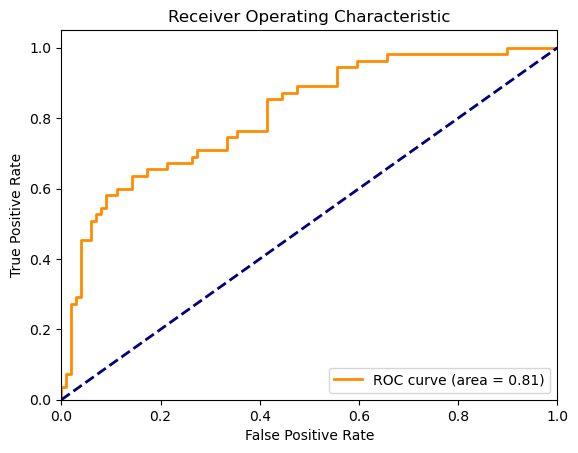

In [37]:
#Visualizing the AUC-ROC score
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#Sets the baseline for any classification algorithm
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## KNN:

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [58]:
#Test different values of k to perform KNN
error_rates = []
k_values = range(1, 101)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)  # Train the model
    Y_pred = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(Y_test, Y_pred)  # Calculate error rate
    error_rates.append(error)

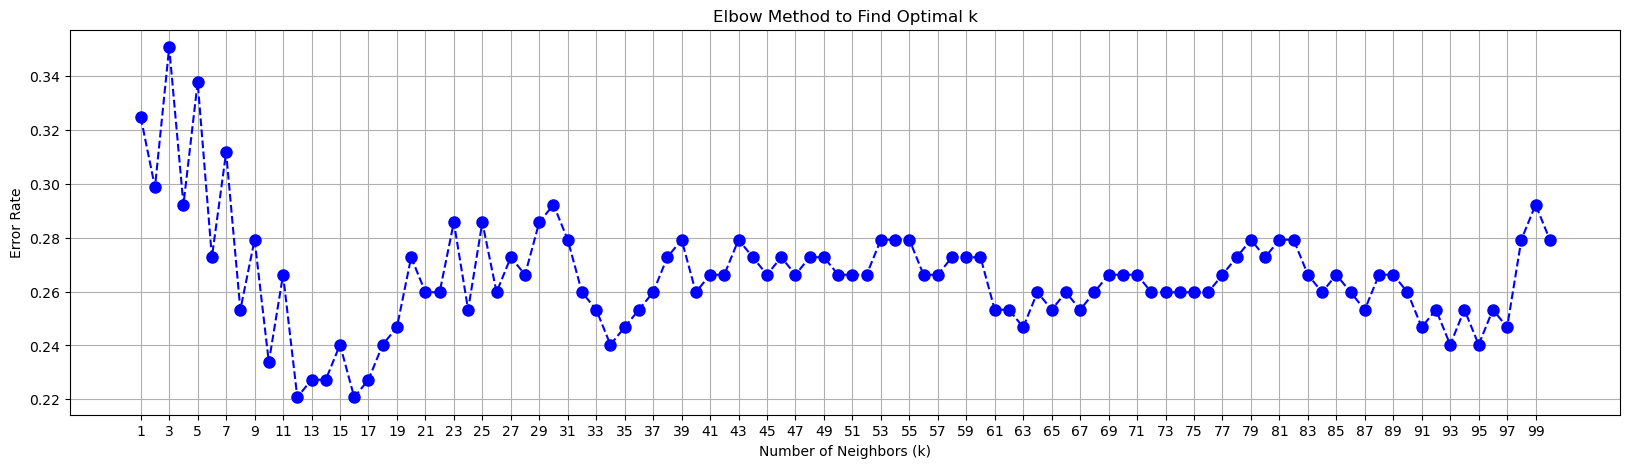

In [62]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 101, step=2))
plt.grid(True)
plt.show()

### Observation: The error rate significantly decreased when k=12 and k=16. After that, we don't see any further dip. 

In [67]:
### Calculate test accuracy when k=12
knn_12 = KNeighborsClassifier(n_neighbors=12)
knn_12.fit(X_train, Y_train)
Y_pred_12 = knn_12.predict(X_test)
print(f"Accuracy score for KNN with 12 neighbors : {accuracy_score(Y_test, Y_pred_12)}")

Accuracy score for KNN with 12 neighbors : 0.7792207792207793


In [69]:
### Calculate test accuracy when k=16
knn_16 = KNeighborsClassifier(n_neighbors=16)
knn_16.fit(X_train, Y_train)
Y_pred_16 = knn_16.predict(X_test)
print(f"Accuracy score for KNN with 16 neighbors : {accuracy_score(Y_test, Y_pred_16)}")

Accuracy score for KNN with 16 neighbors : 0.7792207792207793


### Observation: Since the accuracy score is same for both k=12 and k=16, further perform cross validation

In [74]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [76]:
#Calculate cross validation score k=12 and k=16
score_k_12 = cross_val_score(knn_12, X_train, Y_train, cv=5)
score_k_16 = cross_val_score(knn_16, X_train, Y_train, cv=5)
avg_score_k_12 = mean(score_k_12)
avg_score_k_16 = mean(score_k_16)

print(f"Average score for 12 neighbors: {avg_score_k_12}")
print(f"Average score for 16 neighbors: {avg_score_k_16}")

Average score for 12 neighbors: 0.7378648540583767
Average score for 16 neighbors: 0.7149940023990404


### Observation: Since the cross validation score is higher for 12 neighbors compared to 16, k=12 is choosen as optimal k to perform KNN

### Plot the AUC-ROC curve to compare the performances of Logistic Regression and KNN

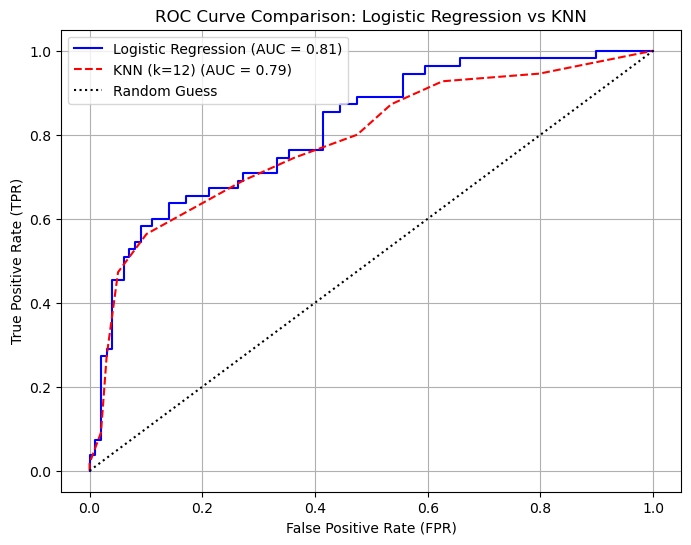

In [80]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_12_probs = knn_12.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for both models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_log = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_12_probs)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=12) (AUC = {auc_knn:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression vs KNN")
plt.legend()
plt.grid(True)
plt.show()

### Observation: The model that is closer to top left is the better performing model. Here Logistic Regression is better performing model, since the AUC score is higher than KNN. This means that Logistic Regression provides a better balance in predicting patients that are diabetic and not diabetic.